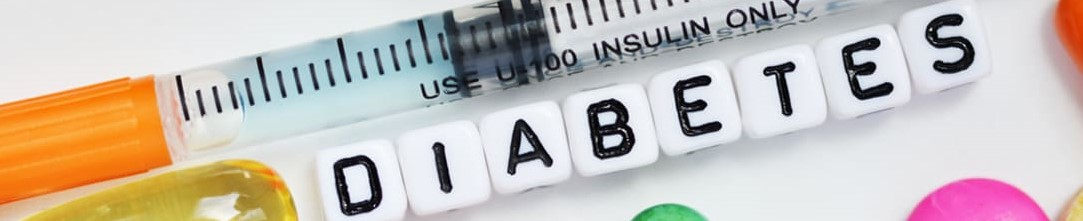

# Diabetes Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


* As we can observe, there's no missing values in the data.
* We can move forward to the next step and start dealing with zeroes in various columns like Blood Pressure, Skin Thickness etc.

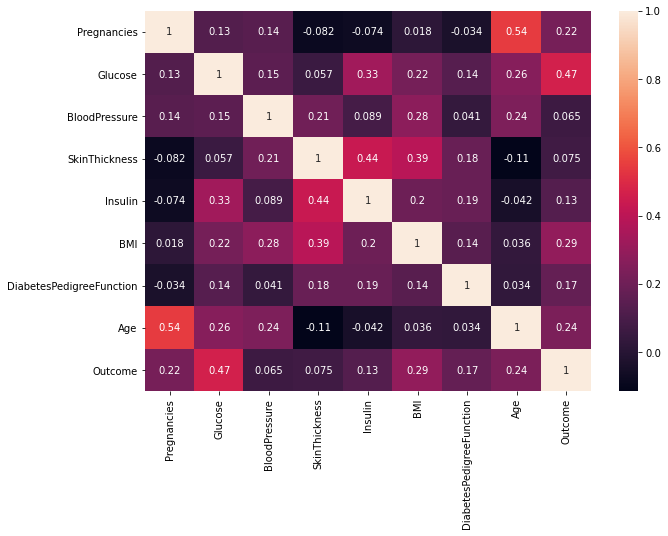

In [6]:
# The heatmap gives us the visual representation of correlation between variables.
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot= True);

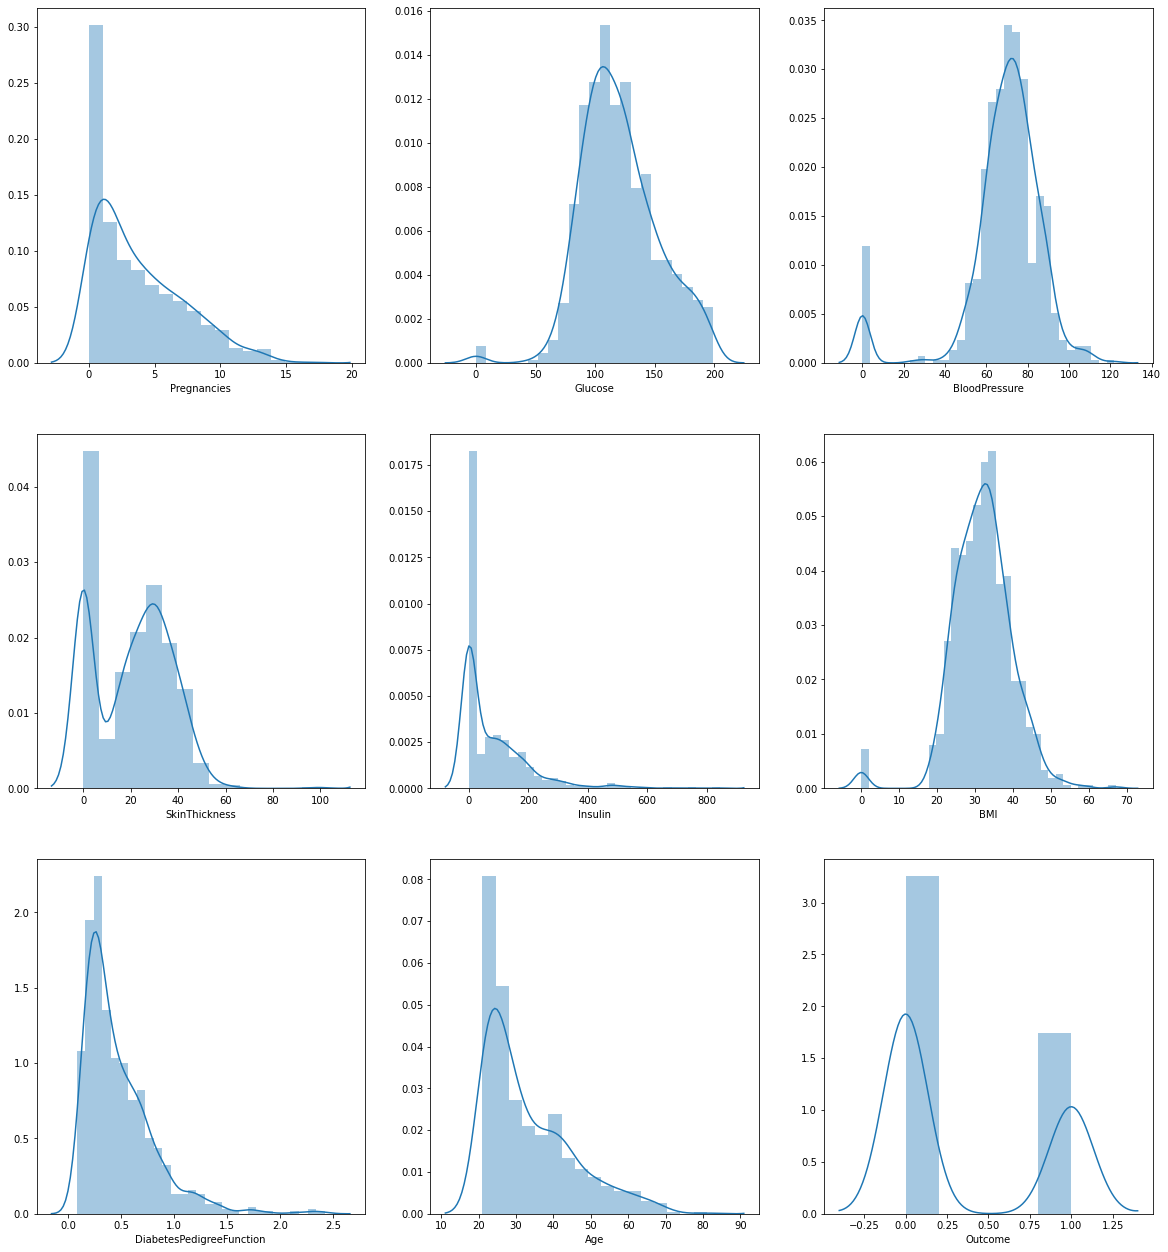

In [7]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in data:
    plt.subplot(4,3,plotnumber)
    sns.distplot(data[str(i)])
    plotnumber += 1

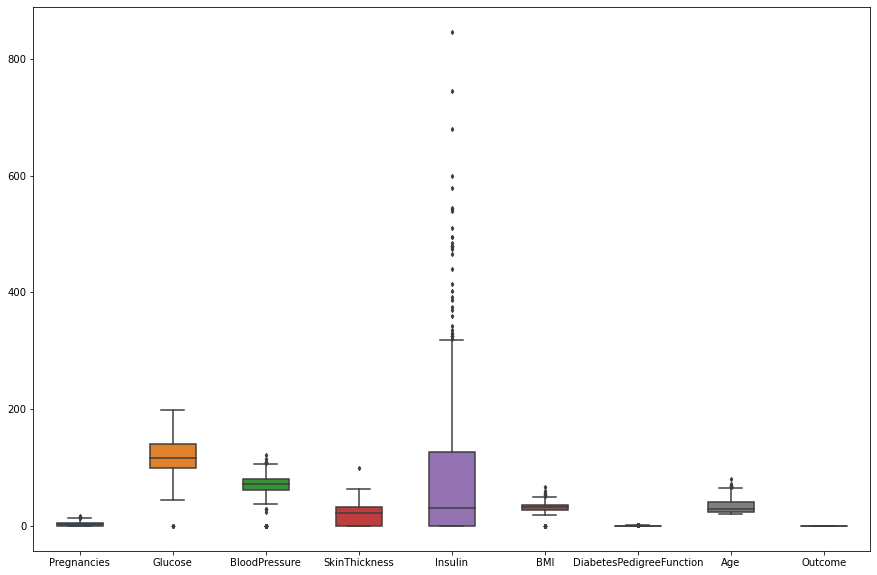

In [8]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 0.5,ax = ax, fliersize= 3)

In [9]:
for i in data.columns:
    print('In ', i,', mean is ', data[data[i] !=0][i].mean(),' and median is ', data[data[i] != 0][i].median())

In  Pregnancies , mean is  4.494672754946728  and median is  4.0
In  Glucose , mean is  121.6867627785059  and median is  117.0
In  BloodPressure , mean is  72.40518417462484  and median is  72.0
In  SkinThickness , mean is  29.153419593345657  and median is  29.0
In  Insulin , mean is  155.5482233502538  and median is  125.0
In  BMI , mean is  32.45746367239099  and median is  32.3
In  DiabetesPedigreeFunction , mean is  0.4718763020833327  and median is  0.3725
In  Age , mean is  33.240885416666664  and median is  29.0
In  Outcome , mean is  1.0  and median is  1.0


In [10]:
for i in data.columns:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [11]:
data.Glucose.replace(0, data.Glucose.mean(), inplace= True)
data.BloodPressure.replace(0, data.BloodPressure.median(), inplace= True)
data.SkinThickness.replace(0, data.SkinThickness.mean(), inplace= True)
data.Insulin.replace(0, data.Insulin.mean(), inplace= True)
data.BMI.replace(0, data.BMI.median(), inplace= True)

In [12]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
py.offline.init_notebook_mode(connected=True)
import cufflinks as cf

In [13]:
import cufflinks as cf
cf.go_offline()
import plotly.figure_factory as ff

In [14]:
for i in data.columns:
    fig = ff.create_distplot([data[i]], group_labels= [str(i)], show_rug= False)
    fig.show()

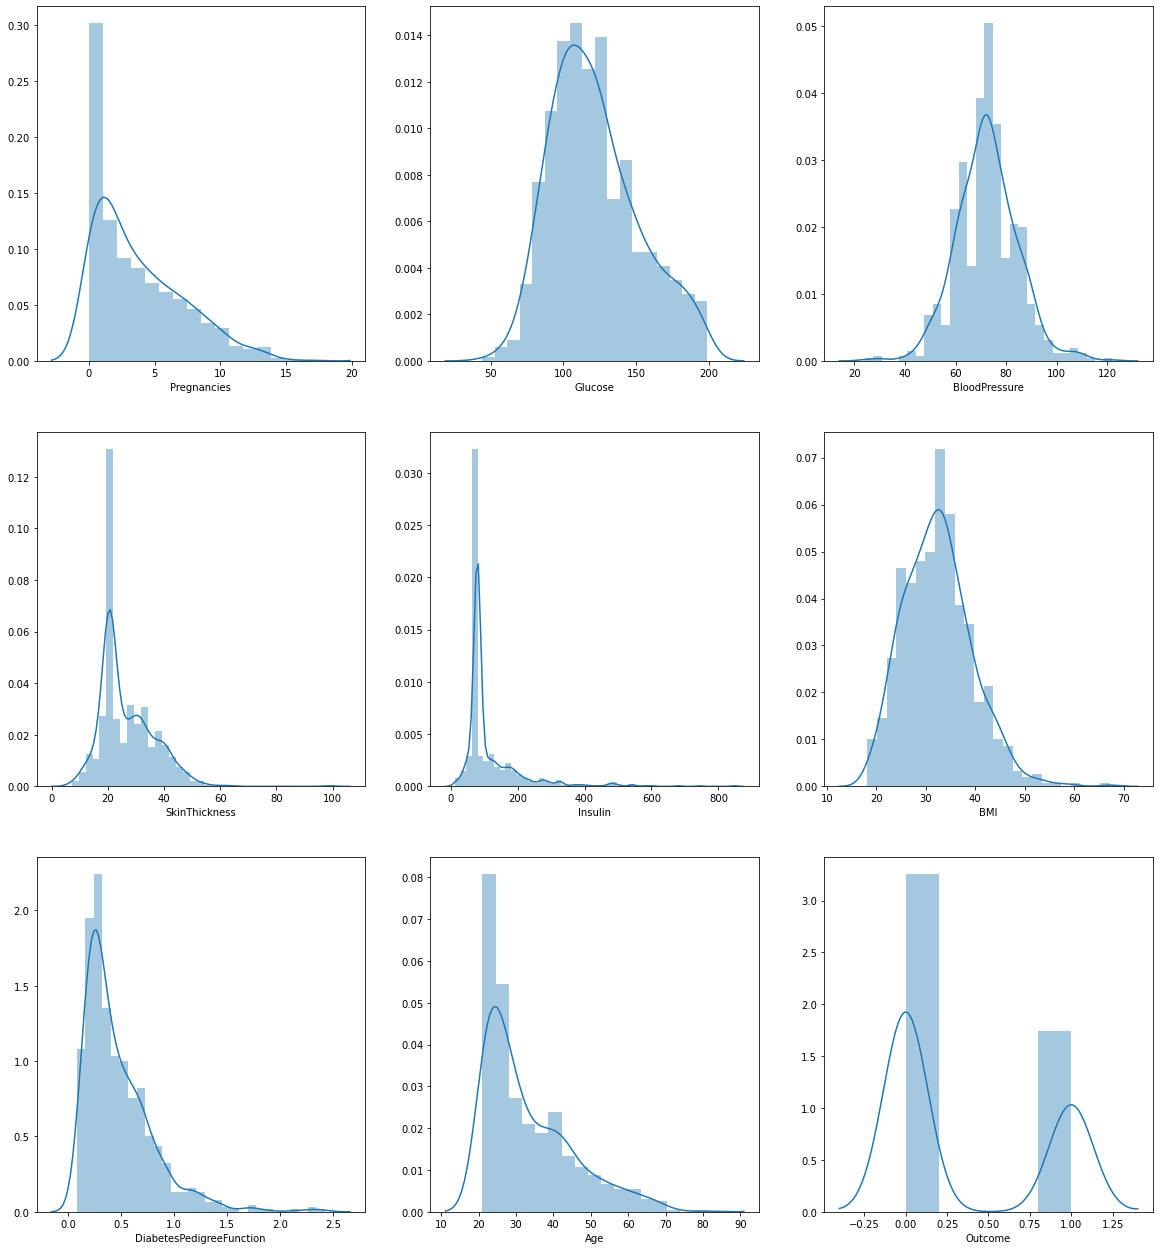

In [15]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in data:
    plt.subplot(4,3,plotnumber)
    sns.distplot(data[str(i)])
    plotnumber += 1

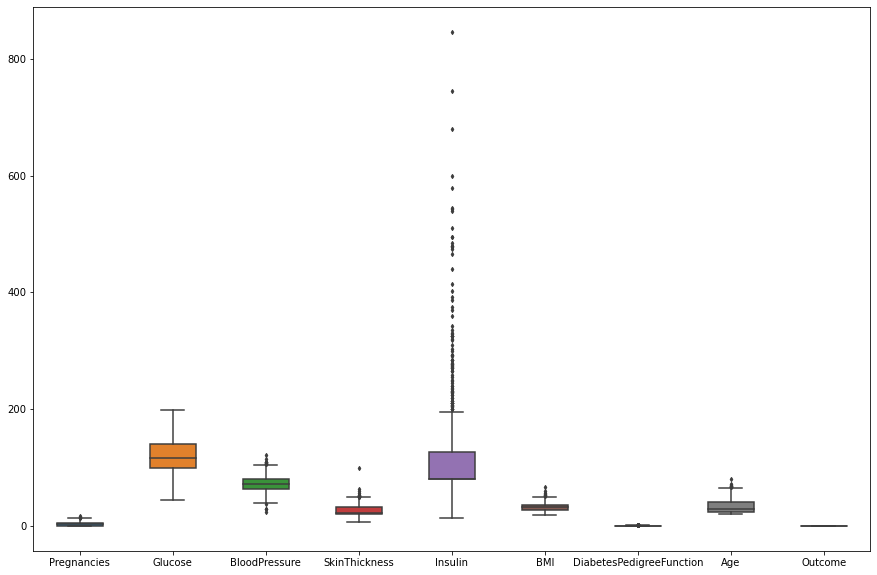

In [16]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 0.5,ax = ax, fliersize= 3)

# Outlier
* Dataset already have very few rows, so we can't drop the rows containing outliers.
* So, we replace the value of outliers with mean + 3*sigma value in case of symmetric distribution or with median + 3*IQR in case of highly skewed distribution .

In [17]:
# Blood Pressure
ra = data.BloodPressure.mean() + 3 * data.BloodPressure.std()
rb = data.BloodPressure.mean() - 3 * data.BloodPressure.std()
data.BloodPressure.replace(list(data.BloodPressure[data.BloodPressure > ra]),ra,inplace = True)
data.BloodPressure.replace(list(data.BloodPressure[data.BloodPressure < rb]),rb,inplace = True)

In [18]:
#Skin THickness
r = data.SkinThickness.median() + 3 * (data.SkinThickness.quantile(0.75) - data.SkinThickness.quantile(0.25))
data.SkinThickness.replace(list(data.SkinThickness[data.SkinThickness > r]),r,inplace = True)

In [19]:
# Insulin
r = data.Insulin.median() + 3 * (data.Insulin.quantile(0.75) - data.Insulin.quantile(0.25))
data.Insulin.replace(list(data.Insulin[data.Insulin > r]),r,inplace = True)

In [20]:
# BMI
r = data.BMI.mean() + 3 * data.BMI.std()
data.BMI.replace(list(data.BMI[data.BMI > r]),r,inplace = True)

In [21]:
# Age
r = data.Insulin.median() + 3 * (data.Insulin.quantile(0.75) - data.Insulin.quantile(0.25))
data.Insulin.replace(list(data.Insulin[data.Insulin > r]),r,inplace = True)

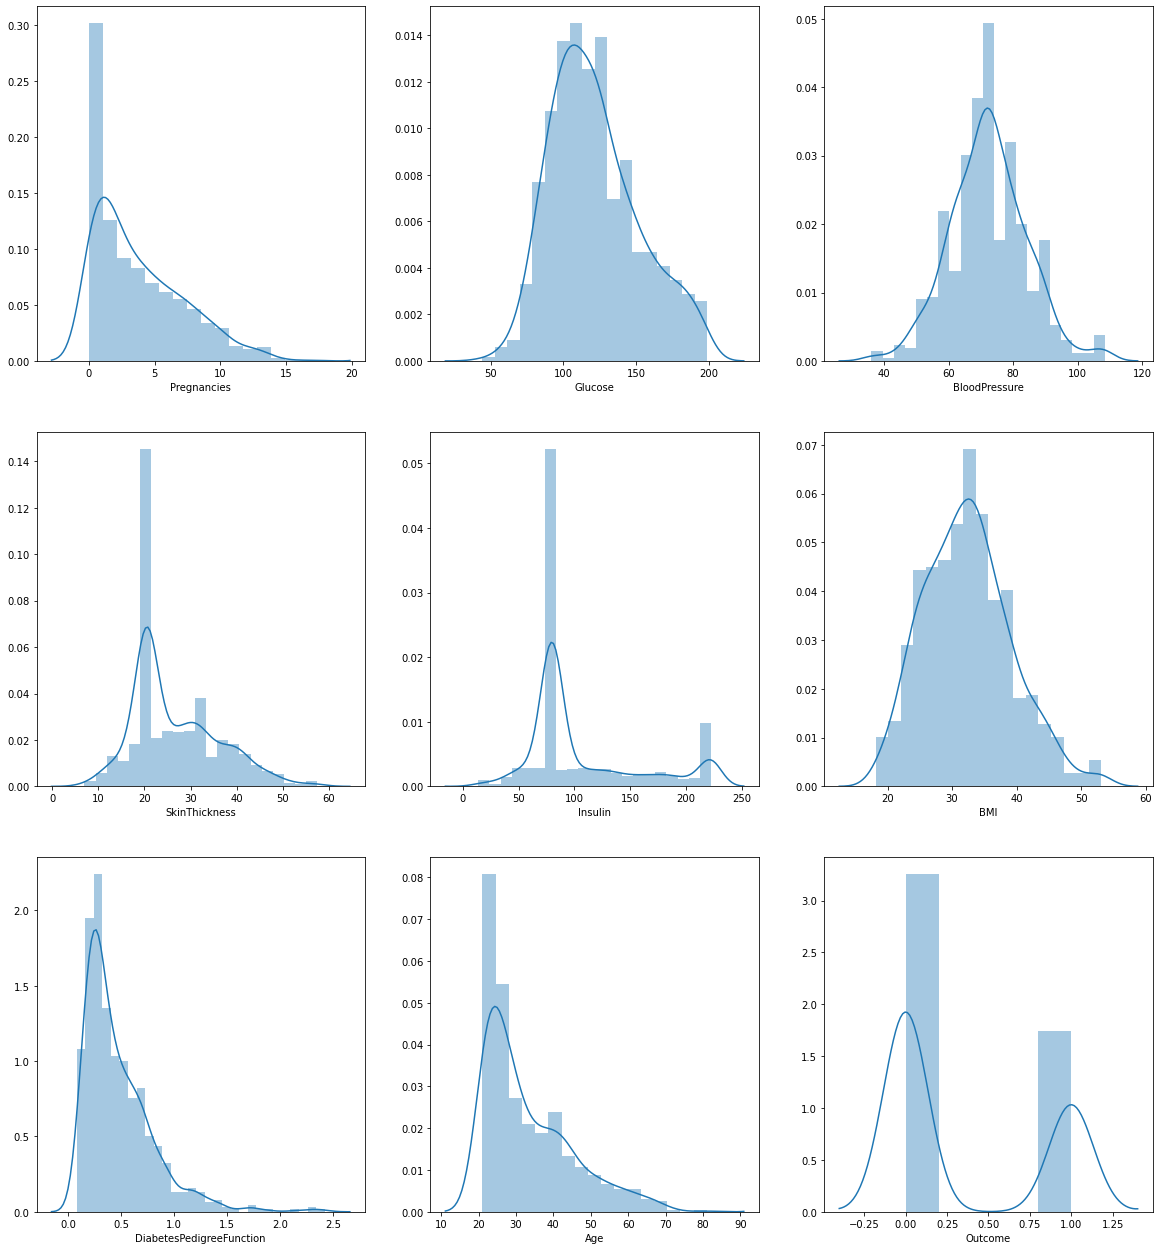

In [22]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in data:
    plt.subplot(4,3,plotnumber)
    sns.distplot(data[str(i)])
    plotnumber += 1

In [23]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [24]:
X = data.drop('Outcome', axis = 1)
Y = data.Outcome

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 35 )

In [26]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
X_scaled = scalar.fit_transform(X)

This Problem is related to Diabetes detection, So our main objective is to build a model that can correctly predict whether a patient is diabetic or not. We should give more priority to `maximize Recall or Sensitivity` and at the same time we should maximize `Precision` or we can say we should minimize the False Positive Rate.

#### Recall or Sensitivity
The mathematical formula is:

   __Recall__= $ \frac{ TP}{(TP+FN)} $

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

### Precision

Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision=$ \frac {TP}{(TP+FP)} $

#### AUC(Area Under Curve)

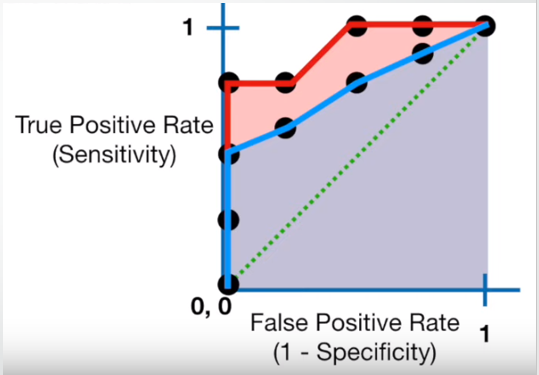

* It helps us to choose the best model amongst the models for which we have plotted the ROC curves
* The best model is the one which encompasses the maximum area under it.
* In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one


In order to do comparison among the models, we use AUC (Area under curve) of Receiver Operator Characteristic, The model with Higher AUC would be selected. 


In [27]:
from sklearn.metrics import confusion_matrix, roc_auc_score
def score(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    conf_mat = confusion_matrix(y_test,y_pred)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]

    Precision = true_positive/(true_positive+false_positive)
    Recall = true_positive/(true_positive+false_negative)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    auc = roc_auc_score(y_test, y_pred)
    
    print('Model Name\t',model)
    print('Precision\t {:.4f}'.format(Precision))
    print('Recall\t\t {:.4f}'.format(Recall))
    print('F1 Score\t {:.4f}'.format(F1_Score))
    print('AUC\t\t {:.4f}'.format(auc))

# Logistic Regression

In [28]:
from sklearn.linear_model  import LogisticRegression
# create model
model = LogisticRegression()
model.fit(x_train,y_train);

In [29]:
score(model,x_test,y_test)

Model Name	 LogisticRegression()
Precision	 0.8900
Recall		 0.7607
F1 Score	 0.8203
AUC		 0.6857


In [32]:
from scipy.stats import uniform
parameter = {'C' : uniform(loc = 0,scale =4) ,'penalty' : ['l1','l2','elasticnet']}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5,scoring='roc_auc'  ,verbose =1, n_jobs=-1,n_iter=10000)
rand_search.fit(x_train,y_train)
model = LogisticRegression(C = rand_search.best_params_['C'],penalty = rand_search.best_params_['penalty'] ,solver = 'liblinear')
model.fit(x_train,y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 6640 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 22640 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 45040 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 50000 out of 50000 | elapsed:   47.7s finished


LogisticRegression(C=2.1860932981149066, solver='liblinear')

In [33]:
score(model,x_test,y_test)

Model Name	 LogisticRegression(C=2.1860932981149066, solver='liblinear')
Precision	 0.8900
Recall		 0.7607
F1 Score	 0.8203
AUC		 0.6857


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
# create model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 DecisionTreeClassifier()
Precision	 0.8200
Recall		 0.7885
F1 Score	 0.8039
AUC		 0.7063


In [37]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=10000)
rand_search.fit(x_train,y_train)
model = DecisionTreeClassifier(criterion = rand_search.best_params_['criterion'],max_depth = rand_search.best_params_['max_depth'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],splitter = rand_search.best_params_['splitter'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 8640 is smaller than n_iter=10000. Running 8640 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 23024 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 37424 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 43200 out of 43200 | elapsed:   48.7s finished


DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=9,
                       min_samples_split=5, splitter='random')

In [38]:
score(model,x_test,y_test)

Model Name	 DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=9,
                       min_samples_split=5, splitter='random')
Precision	 0.8400
Recall		 0.8077
F1 Score	 0.8235
AUC		 0.7348


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
# create model
model = RandomForestClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 RandomForestClassifier()
Precision	 0.8800
Recall		 0.7928
F1 Score	 0.8341
AUC		 0.7270


In [42]:
parameter = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=500)
rand_search.fit(x_train,y_train)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  2.9min finished


RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       n_estimators=130)

In [43]:
score(model,x_test,y_test)

Model Name	 RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       n_estimators=130)
Precision	 0.8800
Recall		 0.7719
F1 Score	 0.8224
AUC		 0.6993


# XG Boost

In [45]:
from xgboost import XGBClassifier
# create model
model = XGBClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Name	 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Precision	 0.8100
Recall		 0.7570
F1 Score	 0.7826
AUC		 0.6643


C:\Users\Aman\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [47]:
parameter={
            'learning_rate':np.arange(0,1,0.05),
            'max_depth': [1,3,5,6,7,8,9,10,12,15],
            'n_estimators':[10,50,100,200],
            'subsample' : np.arange(0.5,1.1,0.1)
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=7,n_iter=500)
rand_search.fit(x_train,y_train)
model = XGBClassifier(objective = 'binary:logistic', learning_rate = rand_search.best_params_['learning_rate'],max_depth = rand_search.best_params_['max_depth'],n_estimators = rand_search.best_params_['n_estimators'],subsample = rand_search.best_params_['subsample'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    1.8s
[Parallel(n_jobs=7)]: Done 214 tasks      | elapsed:   11.8s
[Parallel(n_jobs=7)]: Done 499 tasks      | elapsed:   24.9s
[Parallel(n_jobs=7)]: Done 926 tasks      | elapsed:   46.0s
[Parallel(n_jobs=7)]: Done 1376 tasks      | elapsed:  1.1min
[Parallel(n_jobs=7)]: Done 2073 tasks      | elapsed:  1.6min
[Parallel(n_jobs=7)]: Done 2500 out of 2500 | elapsed:  2.0min finished
C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
score(model,x_test,y_test)

Model Name	 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
Precision	 0.8600
Recall		 0.7611
F1 Score	 0.8075
AUC		 0.6800


C:\Users\Aman\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [49]:
rand_search.best_params_

{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 1, 'learning_rate': 0.1}

# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
# create model
model = KNeighborsClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 KNeighborsClassifier()
Precision	 0.8500
Recall		 0.7589
F1 Score	 0.8019
AUC		 0.6750


In [53]:
parameter ={'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : np.arange(15,35,1),
            'n_neighbors' : np.arange(1,25,1),
            'p' : [1,2],
            'weights' : ['uniform', 'distance'] 
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=15000)
rand_search.fit(x_train,y_train)
model = KNeighborsClassifier(weights = rand_search.best_params_['weights'],p = rand_search.best_params_['p'] ,algorithm = rand_search.best_params_['algorithm'],leaf_size = rand_search.best_params_['leaf_size'],n_neighbors = rand_search.best_params_['n_neighbors'])
model.fit(x_train,y_train)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 5760 is smaller than n_iter=15000. Running 5760 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 23024 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 28800 out of 28800 | elapsed:   41.2s finished


KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)

In [54]:
score(model,x_test,y_test)

Model Name	 KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)
Precision	 0.8800
Recall		 0.7458
F1 Score	 0.8073
AUC		 0.6622


# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 GaussianNB()
Precision	 0.8200
Recall		 0.7664
F1 Score	 0.7923
AUC		 0.6785


# Support Vector Classifier (SVC)

In [58]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 SVC()
Precision	 0.8900
Recall		 0.7607
F1 Score	 0.8203
AUC		 0.6857


In [60]:
parameter={'C':[0.1,1,10,100,500,1000,1250,1500],'gamma':[1,0.1,0.01,0.001],'kernel' :  ['linear', 'rbf']}

from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=100)
rand_search.fit(x_train,y_train)
model = SVC(C = rand_search.best_params_['C'],gamma = rand_search.best_params_['gamma'],kernel = rand_search.best_params_['kernel'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.0min finished


SVC(C=0.1, gamma=1, kernel='linear')

In [62]:
rand_search.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 0.1}

In [65]:
score(model,x_test,y_test)

Model Name	 SVC(C=0.1, gamma=1, kernel='linear')
Precision	 0.8900
Recall		 0.7607
F1 Score	 0.8203
AUC		 0.6857


# Stacking

In [97]:
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [99]:
#XG Boost
xg = XGBClassifier(subsample =  0.7, n_estimators = 200, max_depth = 1, learning_rate =  0.1)

In [100]:
#random Forest
rf = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=90)

In [101]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=7, splitter='random')

In [102]:
# Logistic Regression
lg = LogisticRegression(C=0.4651688967757215, penalty='l1', solver='liblinear')

In [103]:
# KNN
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)

In [104]:
# SVC
svc = SVC(C=0.1, gamma=1, kernel='linear')

In [105]:
from sklearn.model_selection import train_test_split
train,val_train,test,val_test = train_test_split(scaled_data,Y,test_size=0.5, random_state= 355)
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [106]:
for i in [lg, dt, rf, xg, knn, svc]:
    i.fit(x_train,y_train)
    print(i, ' score: ', i.score(x_test,y_test), '\n')

LogisticRegression(C=0.4651688967757215, penalty='l1', solver='liblinear')  score:  0.7532467532467533 

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=7, splitter='random')  score:  0.7532467532467533 

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=90)  score:  0.8181818181818182 

[12:24:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_d

C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [107]:
predict_val1 = xg.predict(val_train)
predict_val2 = knn.predict(val_train)
predict_val3 = rf.predict(val_train)
predict_val4 = svc.predict(val_train)
predict_val5 = lg.predict(val_train)
predict_val6 = dt.predict(val_train)
predict_val = np.column_stack((predict_val1,predict_val2,predict_val3,predict_val4,predict_val5,predict_val6))
predict_val

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [108]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val,val_test)

RandomForestClassifier()

In [109]:
predict_test1 = xg.predict(x_test)
predict_test2 = knn.predict(x_test)
predict_test3 = rf.predict(x_test)
predict_test4 = svc.predict(x_test)
predict_test5 = lg.predict(x_test)
predict_test6 = dt.predict(x_test)
predict_test = np.column_stack((predict_test1,predict_test2,predict_test3,predict_test4,predict_test5,predict_test6))
predict_test

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
 

In [110]:
score(rand_clf,predict_test,y_test)

Model Name	 RandomForestClassifier()
Precision	 0.8800
Recall		 0.7586
F1 Score	 0.8148
AUC		 0.6807


In [111]:
parameter = {
    "n_estimators" : np.arange(50,150,10),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=2000)
rand_search.fit(x_train,y_train)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(predict_val,val_test)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=7,
                       n_estimators=70)

In [112]:
score(model,predict_test,y_test)

Model Name	 RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=7,
                       n_estimators=70)
Precision	 0.9000
Recall		 0.7759
F1 Score	 0.8333
AUC		 0.7093


# Customised Stacking

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 35 )

In [84]:
for j in x_train:
    for i in [lg, dt, rf, xg, knn, svc]:
        print(j)
        i.fit(pd.DataFrame(x_train[str(j)]),y_train)
        score(i,pd.DataFrame(x_test[str(j)]),y_test)
        print('\n')

Pregnancies
Model Name	 LogisticRegression(C=0.4651688967757215, penalty='l1', solver='liblinear')
Precision	 0.8700
Recall		 0.6744
F1 Score	 0.7598
AUC		 0.5461


Pregnancies
Model Name	 DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=7, splitter='random')
Precision	 0.7800
Recall		 0.6724
F1 Score	 0.7222
AUC		 0.5381


Pregnancies
Model Name	 RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=90)
Precision	 0.8100
Recall		 0.6639
F1 Score	 0.7297
AUC		 0.5254


Pregnancies
[12:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Model Name	 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)
Precision	 0.8100
Recall		 0.6639
F1 Score	 0.7297
AUC		 0.5254


Pregnancies
Model Name	 KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)
Precision	 0.8100
Recall		 0.6639
F1 Score	 0.7297
AUC		 0.5254


Pregnancies
Model Name	 SVC(C=0.1, gamma=1, kernel='linear')
Precision	 1.0000
Recall		 0.6494
F1 Score	 0.7874
AUC		 0.5000


Glucose
Model Name	 LogisticRegression(C=0.465168896775

C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



 KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)
Precision	 0.9000
Recall		 0.7317
F1 Score	 0.8072
AUC		 0.6444


Glucose
Model Name	 SVC(C=0.1, gamma=1, kernel='linear')
Precision	 0.9100
Recall		 0.7339
F1 Score	 0.8125
AUC		 0.6494


BloodPressure
Model Name	 LogisticRegression(C=0.4651688967757215, penalty='l1', solver='liblinear')
Precision	 0.9800
Recall		 0.6490
F1 Score	 0.7809
AUC		 0.4993


BloodPressure
Model Name	 DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=7, splitter='random')
Precision	 0.8700
Recall		 0.6493
F1 Score	 0.7436
AUC		 0.4998


BloodPressure
Model Name	 RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=90)
Precision	 0.8700
Recall		 0.6493
F1 Score	 0.7436
AUC		 0.4998


BloodPressure
[12:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.

C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Model Name	 KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)
Precision	 0.9000
Recall		 0.6475
F1 Score	 0.7531
AUC		 0.4963


BloodPressure
Model Name	 SVC(C=0.1, gamma=1, kernel='linear')
Precision	 1.0000
Recall		 0.6494
F1 Score	 0.7874
AUC		 0.5000


SkinThickness
Model Name	 LogisticRegression(C=0.4651688967757215, penalty='l1', solver='liblinear')
Precision	 0.9700
Recall		 0.6510
F1 Score	 0.7791
AUC		 0.5035


SkinThickness
Model Name	 DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=7, splitter='random')
Precision	 0.9300
Recall		 0.6458
F1 Score	 0.7623
AUC		 0.4928


SkinThickness
Model Name	 RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=90)
Precision	 0.9200
Recall		 0.6667
F1 Score	 0.7731
AUC		 0.5341


SkinThickness
[12:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Model Name	 KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)
Precision	 0.9200
Recall		 0.6619
F1 Score	 0.7699
AUC		 0.5248


SkinThickness
Model Name	 SVC(C=0.1, gamma=1, kernel='linear')
Precision	 1.0000
Recall		 0.6494
F1 Score	 0.7874
AUC		 0.5000


Insulin
Model Name	 LogisticRegression(C=0.4651688967757215, penalty='l1', solver='liblinear')
Precision	 0.9600
Recall		 0.6809
F1 Score	 0.7967
AUC		 0.5633


Insulin
Model Name	 DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=7, splitter='random')
Precision	 0.8900
Recall		 0.7008
F1 Score	 0.7841
AUC		 0.5931


Insulin
Model Name	 RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=90)
Precision	 0.8800
Recall		 0.6617
F1 Score	 0.7554
AUC		 0.5233


Insulin
[12:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095

C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Model Name	 KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)
Precision	 0.8800
Recall		 0.6617
F1 Score	 0.7554
AUC		 0.5233


Insulin
Model Name	 SVC(C=0.1, gamma=1, kernel='linear')
Precision	 1.0000
Recall		 0.6494
F1 Score	 0.7874
AUC		 0.5000


BMI
Model Name	 LogisticRegression(C=0.4651688967757215, penalty='l1', solver='liblinear')
Precision	 0.9400
Recall		 0.6912
F1 Score	 0.7966
AUC		 0.5811


BMI
Model Name	 DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=7, splitter='random')
Precision	 1.0000
Recall		 0.6494
F1 Score	 0.7874
AUC		 0.5000


BMI
Model Name	 RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=90)
Precision	 0.8600
Recall		 0.6880
F1 Score	 0.7644
AUC		 0.5689


BMI


C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[12:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Name	 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)
Precision	 0.9500
Recall		 0.6738
F1 Score	 0.7884
AUC		 0.5491


BMI
Model Name	 KNeighborsClassifier

C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




Precision	 0.9400
Recall		 0.6438
F1 Score	 0.7642
AUC		 0.4885


DiabetesPedigreeFunction
Model Name	 KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)
Precision	 0.9000
Recall		 0.6429
F1 Score	 0.7500
AUC		 0.4870


DiabetesPedigreeFunction
Model Name	 SVC(C=0.1, gamma=1, kernel='linear')
Precision	 1.0000
Recall		 0.6494
F1 Score	 0.7874
AUC		 0.5000


Age
Model Name	 LogisticRegression(C=0.4651688967757215, penalty='l1', solver='liblinear')
Precision	 0.8800
Recall		 0.6519
F1 Score	 0.7489
AUC		 0.5048


Age
Model Name	 DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       min_samples_split=7, splitter='random')
Precision	 0.8100
Recall		 0.6694
F1 Score	 0.7330
AUC		 0.5346


Age
Model Name	 RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=90)
Precision	 0.7500
Recall		 0.6757
F1 Score	 0.7109
AUC		 0.5417


Age
[12:14:03] WA

C:\Users\Aman\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Model Name	 KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, n_neighbors=21)
Precision	 0.7400
Recall		 0.6667
F1 Score	 0.7014
AUC		 0.5274


Age
Model Name	 SVC(C=0.1, gamma=1, kernel='linear')
Precision	 1.0000
Recall		 0.6494
F1 Score	 0.7874
AUC		 0.5000




In [135]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [136]:
from sklearn.model_selection import train_test_split
train,val_train,test,val_test = train_test_split(scaled_data,Y,test_size=0.5, random_state= 35)
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 35)

In [137]:
m1 = lg.fit(pd.DataFrame(x_train[:,[0,1,4,5]]),y_train)
dt.fit(pd.DataFrame(x_train[:,[2,6,7]]),y_train)
knn.fit(pd.DataFrame(x_train[:,3]),y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=31, n_neighbors=22, p=1)

In [138]:
from scipy.stats import uniform
parameter = {'C' : uniform(loc = 0,scale =4) ,'penalty' : ['l1','l2','elasticnet']}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=m1,param_distributions=parameter,cv =5,scoring='roc_auc'  ,verbose =1, n_jobs=-1,n_iter=10000)
rand_search.fit(pd.DataFrame(x_train[:,[0,1,4,5]]),y_train)
m1 = LogisticRegression(C = rand_search.best_params_['C'],penalty = rand_search.best_params_['penalty'] ,solver = 'liblinear')
m1.fit(pd.DataFrame(x_train[:,[0,1,4,5]]),y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 23024 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 37424 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 50000 out of 50000 | elapsed:  1.1min finished


LogisticRegression(C=0.23083559395073205, penalty='l1', solver='liblinear')

In [139]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=dt,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=10000)
rand_search.fit(pd.DataFrame(x_train[:,[2,6,7]]),y_train)
dt = DecisionTreeClassifier(criterion = rand_search.best_params_['criterion'],max_depth = rand_search.best_params_['max_depth'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],splitter = rand_search.best_params_['splitter'])
dt.fit(pd.DataFrame(x_train[:,[2,6,7]]),y_train)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 8640 is smaller than n_iter=10000. Running 8640 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 18960 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 27760 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 38160 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 43200 out of 43200 | elapsed:  1.1min finished


DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=7,
                       splitter='random')

In [140]:
parameter ={'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : np.arange(15,35,1),
            'n_neighbors' : np.arange(1,25,1),
            'p' : [1,2],
            'weights' : ['uniform', 'distance'] 
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=knn,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=15000)
rand_search.fit(pd.DataFrame(x_train[:,3]),y_train)
knn = KNeighborsClassifier(weights = rand_search.best_params_['weights'],p = rand_search.best_params_['p'] ,algorithm = rand_search.best_params_['algorithm'],leaf_size = rand_search.best_params_['leaf_size'],n_neighbors = rand_search.best_params_['n_neighbors'])
knn.fit(pd.DataFrame(x_train[:,3]),y_train)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 5760 is smaller than n_iter=15000. Running 5760 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 18960 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 27760 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 28800 out of 28800 | elapsed:   49.9s finished


KNeighborsClassifier(algorithm='kd_tree', leaf_size=31, n_neighbors=13, p=1)

In [141]:
predict_val1 = m1.predict(pd.DataFrame(val_train[:,[0,1,4,5]]))
predict_val2 = dt.predict(pd.DataFrame(val_train[:,[2,6,7]]))
predict_val3 = knn.predict(pd.DataFrame(val_train[:,3]))

predict_val = np.column_stack((predict_val1,predict_val2,predict_val3))
predict_val

array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

In [142]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val,val_test)

RandomForestClassifier()

In [143]:
predict_test1 = m1.predict(pd.DataFrame(x_test[:,[0,1,4,5]]))
predict_test2 = dt.predict(pd.DataFrame(x_test[:,[2,6,7]]))
predict_test3 = knn.predict(pd.DataFrame(x_test[:,3]))


predict_test = np.column_stack((predict_test1,predict_test2,predict_test3))
predict_test

array([[1, 0, 0],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 1, 0],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [1,

In [144]:
score(rand_clf,predict_test,y_test)

Model Name	 RandomForestClassifier()
Precision	 0.9583
Recall		 0.8214
F1 Score	 0.8846
AUC		 0.8068


In [145]:
parameter = {
    "n_estimators" : np.arange(50,150,10),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=2000)
rand_search.fit(predict_val,val_test)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(predict_val,val_test)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 10000 out of 10000

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=60)

In [146]:
score(model,predict_test,y_test)

Model Name	 RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=60)
Precision	 0.9583
Recall		 0.8214
F1 Score	 0.8846
AUC		 0.8068


# Conclusion

#### The Machine Learning model gives the results as follows:

***
                                         Precision       Recall       F1 Score       AUC
     Naive Bayes                      :   0.8200         0.7664        0.7923       0.6785     
     XG Boost                         :   0.8600         0.7611        0.8075       0.6800
     KNN                              :   0.8500         0.7589        0.8019       0.6750
     Stacking                         :   0.9000         0.7759        0.8333       0.7093    
     Decision Tree                    :   0.8400         0.8077        0.8235       0.7348
     Logistic Regression              :   0.8900         0.7607        0.8203       0.6857
     Random Forest                    :   0.8800         0.7928        0.8341       0.7270
     Support Vector Classifier (SVC)  :   0.8900         0.7607        0.8203       0.6857
     Customised Stacking              :   0.9583         0.8214        0.8846       0.8068
     
***
#### On the basis of above scores, It is clear that `Customised Stacking` perform exceptionally well. So, `Customised Stacking` must be deployed for Diabetes dataset.